In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression ,Ridge , Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

# Data Transformer

## Polynomial Feature

### include_bias=True
$ f(x) = \alpha x + \beta $

$ f(x) = \alpha_1 x_1 + \alpha_2 X_2  $
<br>
بعدش
$x_2 = 1$
<br>
الان خیلی جنرال شد و عرض از مبدع رو حساب نمیکنیم $  \beta $ و با این کار القا2 میشه یه مقدار کامل و ما الفا2 رو یه فیچر حساب میکنیم 
<br>
<br>
با این کار میاد اون 1 رو هم اضافه میکنه
<br>
<b>fit_intercept=False پس با این کار دیگه عرض از مبدا رو لازم نداریم پس میاییم</b>



In [23]:
A = np.array([[1,2],[3,4]])

poly = PolynomialFeatures(degree=2)  # درجه رو میزنه
poly.fit(A)
A_p = poly.transform(A)
A_p

# ردیف 1 همون عرض از مبدا 
# ردیف 2 و 3 خود دیتاس
# ردیف 4 و 6 دیتا به توان درجه یا 2
# ردیف 5 ضرب دیتاس -> ضرب چند جمله ای نیوتون

array([[ 1.,  1.,  2.,  1.,  2.,  4.],
       [ 1.,  3.,  4.,  9., 12., 16.]])

### interaction_only=False
ردیف 5 ضرب دیتاس رو نشون میده و اگه ترو باشه نشون نمیده

In [24]:
x = np.radians(np.linspace(1,200)).reshape(-1,1)
y = np.cos(x) + np.random.uniform(-0.1,0.1,x.shape[0]).reshape(-1,1)

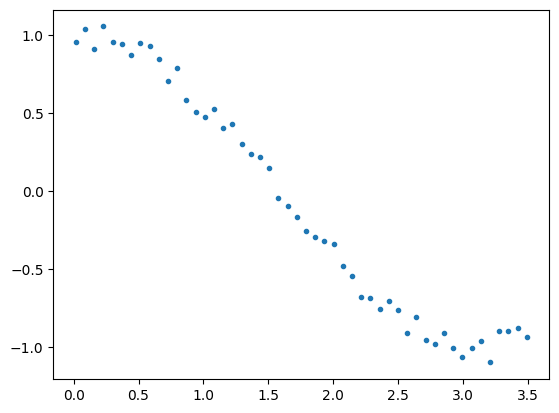

In [25]:
plt.scatter(x.reshape(-1),y,marker='.')

In [26]:
def train(x,y,d=1):
    T = PolynomialFeatures(d)
    x_new = T.fit_transform(x)
    
    model = LinearRegression(fit_intercept= False)
    model.fit(x_new,y)
    s = model.score(x_new,y)
    p = model.predict(x_new)
    e = mean_absolute_error(y,p)
    return model,s,e,p

In [27]:
train(x,y,1)[:3]

(LinearRegression(fit_intercept=False),
 0.9548762884077333,
 0.12978750419172402)

In [28]:
train(x,y,2)[:3]

(LinearRegression(fit_intercept=False),
 0.9640938203868462,
 0.11728299456817552)

In [29]:
train(x,y,3)[:3]

(LinearRegression(fit_intercept=False),
 0.9945165945115458,
 0.047927176254176904)

In [30]:
train(x,y,5)[:3]

(LinearRegression(fit_intercept=False),
 0.994521202834437,
 0.047963798796622076)

In [31]:
res=[]
for i in range(1,15):
    r = train(x,y,i)[:3]
    res.append(r)
res

[(LinearRegression(fit_intercept=False),
  0.9548762884077333,
  0.12978750419172402),
 (LinearRegression(fit_intercept=False),
  0.9640938203868462,
  0.11728299456817552),
 (LinearRegression(fit_intercept=False),
  0.9945165945115458,
  0.047927176254176904),
 (LinearRegression(fit_intercept=False),
  0.994521086585968,
  0.047954148326682725),
 (LinearRegression(fit_intercept=False),
  0.994521202834437,
  0.047963798796622076),
 (LinearRegression(fit_intercept=False),
  0.9945995856058335,
  0.04769240340962787),
 (LinearRegression(fit_intercept=False),
  0.994601276090004,
  0.047704471293862995),
 (LinearRegression(fit_intercept=False),
  0.9946540055321732,
  0.04659423392711998),
 (LinearRegression(fit_intercept=False),
  0.9951253421566336,
  0.04487434088817637),
 (LinearRegression(fit_intercept=False),
  0.9951665120773969,
  0.04438281499916651),
 (LinearRegression(fit_intercept=False),
  0.9951737989775065,
  0.044292529851201114),
 (LinearRegression(fit_intercept=False),


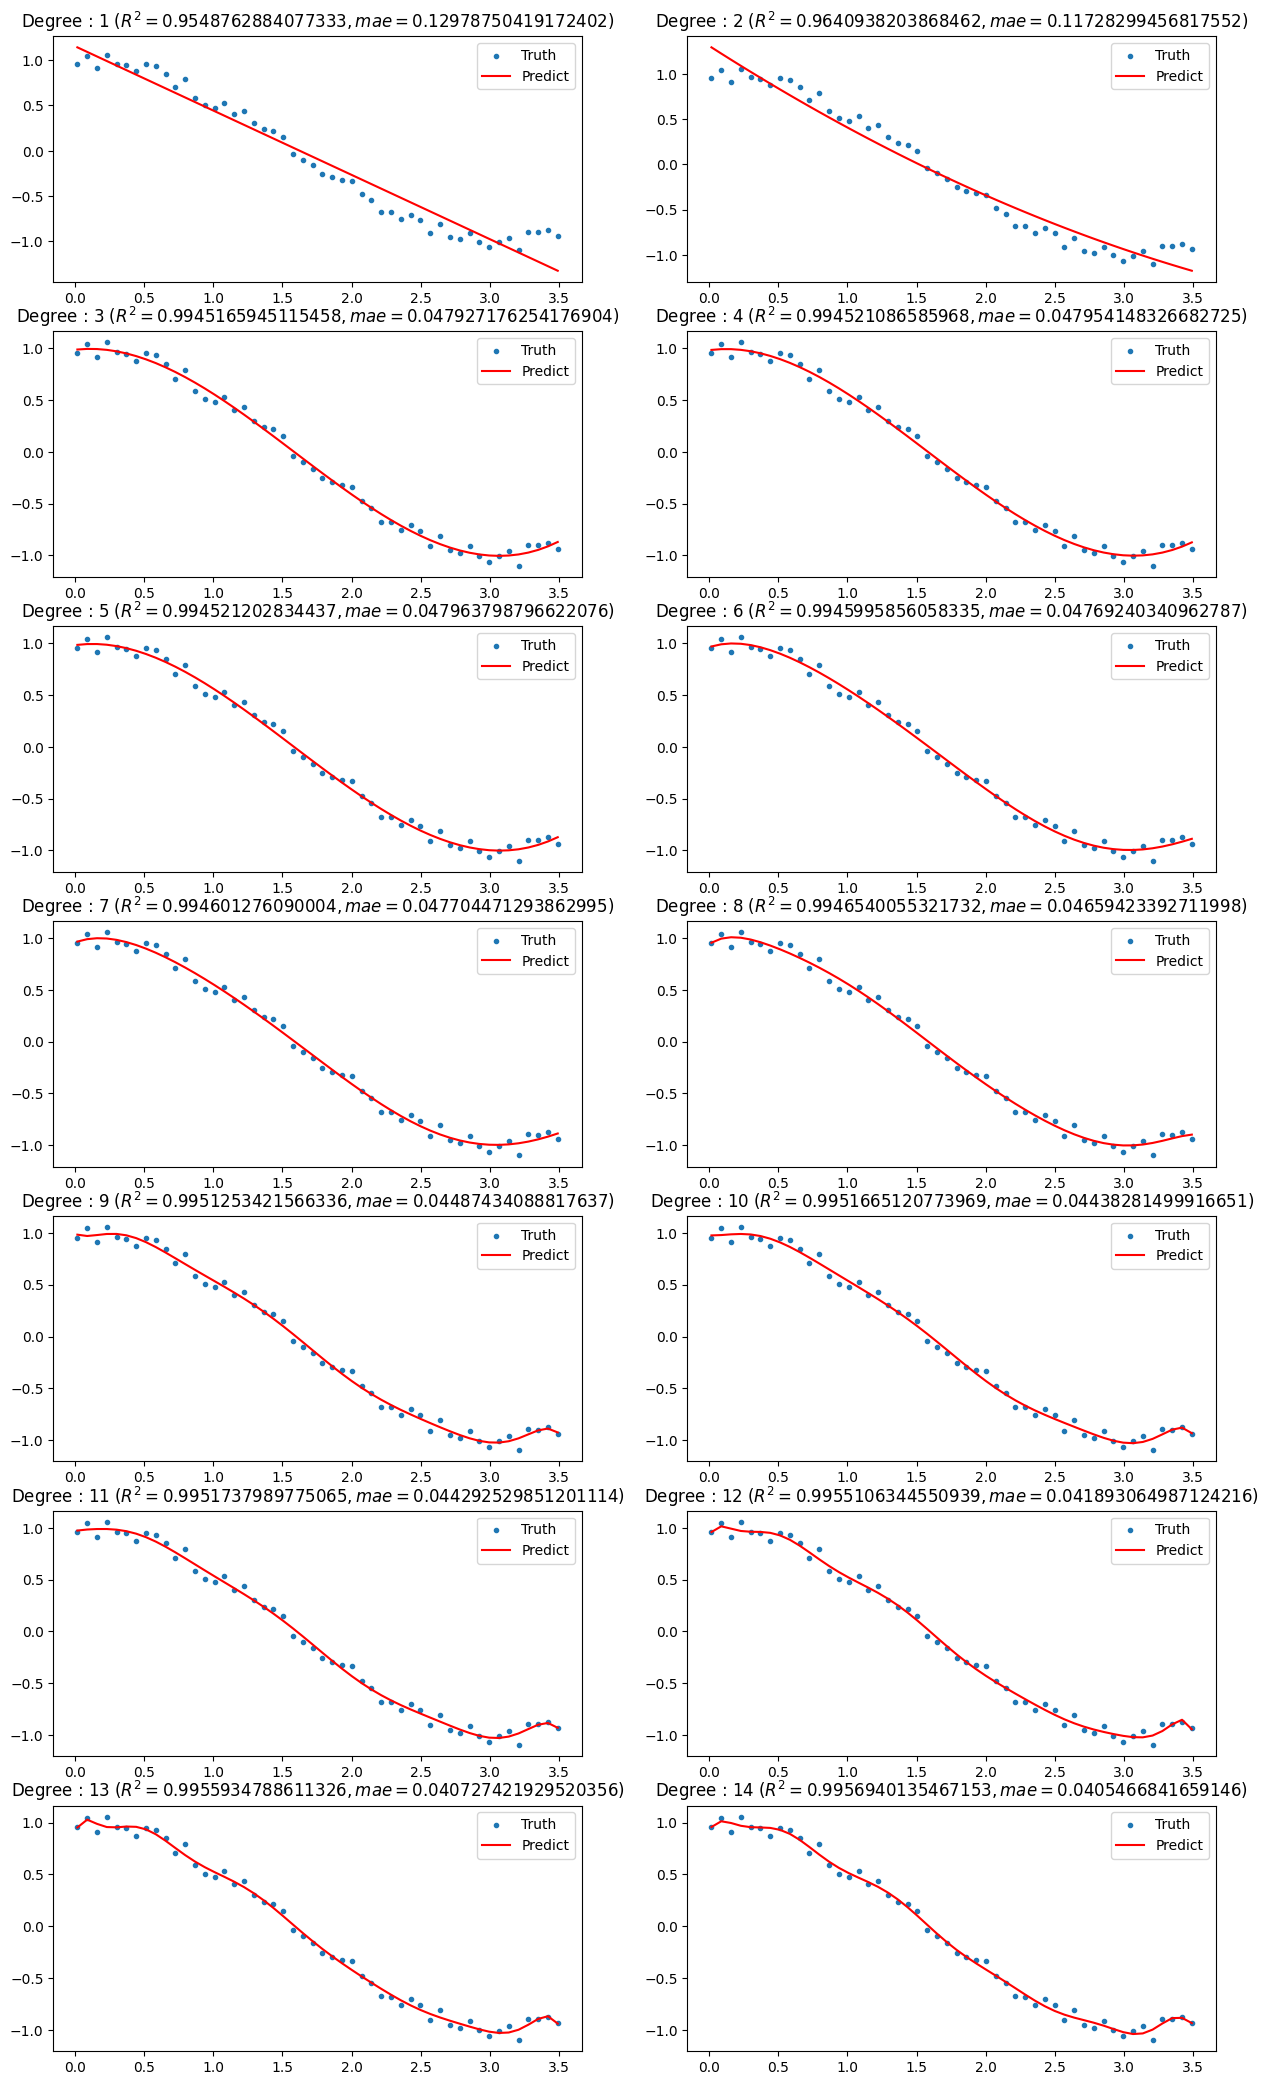

In [35]:
plt.figure(figsize=(15,30))


for i in range(1,15):
    plt.subplot(8,2,i)
    plt.scatter(x,y,marker='.')
    model = train(x,y,i )
    p = np.array(model[3]).reshape(-1,1)
    plt.plot(x,p,'r')
    plt.legend(['Truth','Predict'])
    plt.title(f'Degree : {i} ($R^2={model[1]} ,mae={model[2]}$)')

Text(0.5, 1.0, 'Degree : 100')

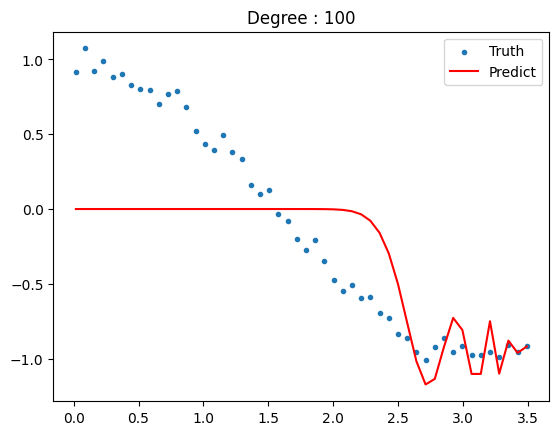

In [ ]:

plt.scatter(x,y,marker='.')
p = np.array(train(x,y,50 )[3]).reshape(-1,1)
plt.plot(x,p,'r')
plt.legend(['Truth','Predict'])
plt.title('Degree : 100')

Text(0.5, 1.0, 'Degree : 100')

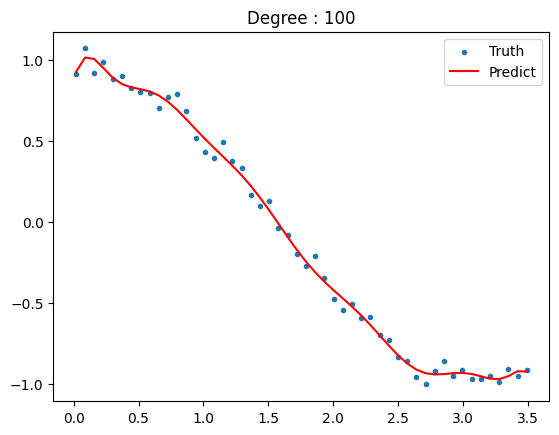

In [ ]:
plt.scatter(x,y,marker='.')
p = np.array(train(x,y,14 )[3]).reshape(-1,1)
plt.plot(x,p,'r')
plt.legend(['Truth','Predict'])
plt.title('Degree : 100')

In [ ]:
def train_ridge(x,y,d=1,alpha=1):
    T = PolynomialFeatures(d)
    x_new = T.fit_transform(x)
    
    model = Ridge(alpha= alpha)
    model.fit(x_new,y)
    s = model.score(x_new,y)
    p = model.predict(x_new)
    e = mean_absolute_error(y,p)
    return model,s,e,p

Text(0.5, 1.0, 'Degree : 100')

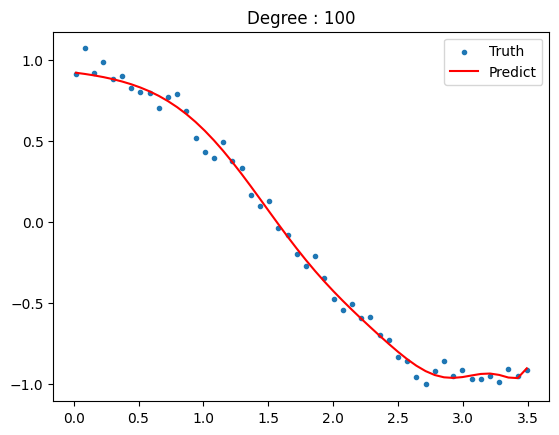

In [ ]:
plt.scatter(x,y,marker='.')
p = np.array(train_ridge(x,y,14,2 )[3]).reshape(-1,1)
plt.plot(x,p,'r')
plt.legend(['Truth','Predict'])
plt.title('Degree : 100')

In [38]:
def train_Lasso(x,y,d=1,alpha=1):
    T = PolynomialFeatures(d)
    x_new = T.fit_transform(x)
    
    model = Lasso(alpha= alpha,max_iter=1000000)
    model.fit(x_new,y)
    s = model.score(x_new,y)
    p = model.predict(x_new)
    e = mean_absolute_error(y,p)
    return model,s,e,p

c:\Users\Taha\Desktop\python_p\AI\Learning_venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.370e-02, tolerance: 2.759e-03
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'Degree : 100')

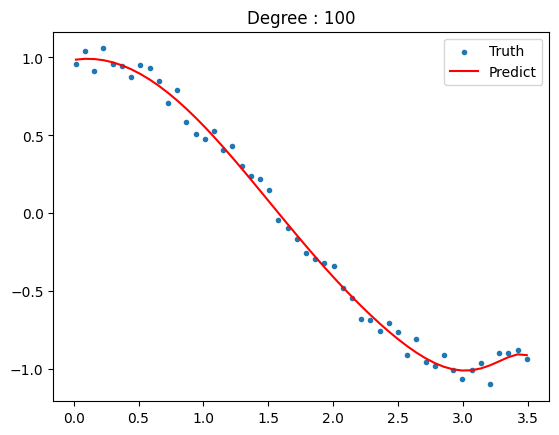

In [39]:
plt.scatter(x,y,marker='.')
p = np.array(train_Lasso(x,y,14,0.00000001 )[3]).reshape(-1,1)
plt.plot(x,p,'r')
plt.legend(['Truth','Predict'])
plt.title('Degree : 100')